<a href="https://colab.research.google.com/github/iamzhenxp/E4418-Transportation-Anlytics-Logistic/blob/FInal-project/Minneapolis_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scooter_df = pd.read_csv('https://raw.githubusercontent.com/iamzhenxp/E4418-Transportation-Anlytics-Logistic/FInal-project/FInal%20Project/Scooter%20Data.csv', encoding='unicode_escape')
centerline_df = pd.read_csv('https://raw.githubusercontent.com/iamzhenxp/E4418-Transportation-Anlytics-Logistic/FInal-project/FInal%20Project/CenterlineID.csv', encoding='unicode_escape')

In [ ]:
centerline_zipcode = pd.DataFrame(centerline_df[['GBSID', 'ZIP5_L']])

In [ ]:
scooter_zipcode_df = pd.merge(scooter_df, centerline_zipcode, left_on='StartCenterlineID', right_on = 'GBSID', how="left")
scooter_zipcode_df = scooter_zipcode_df.rename(columns = {'ZIP5_L':'Zipcode'})

In [ ]:
scooter_zipcode_df.head()

,ï»¿ObjectId,TripID,TripDuration,TripDistance,StartTime,EndTime,StartCenterlineID,StartCenterlineType,EndCenterlineID,EndCenterlineType,GBSID,Zipcode
0,1,1256,289,1453,2021/04/29 20:00:00+00,2021/04/29 20:00:00+00,16644.0,street,15359.0,street,16644.0,55414.0
1,2,1336,490,1561,2021/04/29 20:00:00+00,2021/04/29 20:00:00+00,16638.0,street,26004.0,street,16638.0,55414.0
2,3,1344,246,96,2021/04/29 20:00:00+00,2021/04/29 20:00:00+00,16641.0,street,16641.0,street,16641.0,55414.0
3,4,1361,3900,5101,2021/04/29 20:00:00+00,2021/04/29 21:00:00+00,20562.0,street,15844.0,street,20562.0,55401.0
4,5,1357,734,3653,2021/04/29 20:29:59+00,2021/04/29 20:29:59+00,17095.0,street,NaN,trail,17095.0,55403.0


In [ ]:
scooter_zipcode_df = scooter_zipcode_df[['TripDuration', 'TripDistance', 'StartTime', 'StartCenterlineID', 'Zipcode']]

In [ ]:
zipcode_unique = scooter_zipcode_df['Zipcode'].unique()

In [ ]:
zipcode_unique.shape

(28,)

In [ ]:
type(scooter_zipcode_df['StartTime'][0])

str

In [ ]:
scooter_zipcode_df['Date'] = np.zeros(len(scooter_zipcode_df))
scooter_zipcode_df['Time'] = np.zeros(len(scooter_zipcode_df))
scooter_zipcode_df['Dayofweek'] = np.zeros(len(scooter_zipcode_df))
scooter_zipcode_df


,TripDuration,TripDistance,StartTime,StartCenterlineID,Zipcode,Month,Time,Dayofweek,Date
0,289,1453,2021/04/29 20:00:00+00,16644.0,55414.0,4.0,0.0,0.0,0.0
1,490,1561,2021/04/29 20:00:00+00,16638.0,55414.0,4.0,0.0,0.0,0.0
2,246,96,2021/04/29 20:00:00+00,16641.0,55414.0,4.0,0.0,0.0,0.0
3,3900,5101,2021/04/29 20:00:00+00,20562.0,55401.0,4.0,0.0,0.0,0.0
4,734,3653,2021/04/29 20:29:59+00,17095.0,55403.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
441719,677,3212,2021/12/05 04:30:00+00,16901.0,55401.0,12.0,0.0,0.0,0.0
441720,254,353,2021/12/05 05:29:59+00,16661.0,55403.0,12.0,0.0,0.0,0.0
441721,540,1156,2021/12/05 06:00:00+00,NaN,NaN,12.0,0.0,0.0,0.0
441722,402,1184,2021/12/05 17:00:00+00,25217.0,55407.0,12.0,0.0,0.0,0.0


In [ ]:
print(st.date())

2021-12-05


In [ ]:
for i in range(len(scooter_zipcode_df)):
  st = datetime.strptime(scooter_zipcode_df['StartTime'][i],'%Y/%m/%d %H:%M:%S+00')
  scooter_zipcode_df['Date'][i] = st.date()
  scooter_zipcode_df['Time'][i] = st.hour
  scooter_zipcode_df['Dayofweek'][i] = st.weekday()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
scooter_zipcode_df

,TripDuration,TripDistance,StartTime,StartCenterlineID,Zipcode,Month,Time,Dayofweek,Date
0,289,1453,2021/04/29 20:00:00+00,16644.0,55414.0,4.0,20.0,3.0,2021-04-29
1,490,1561,2021/04/29 20:00:00+00,16638.0,55414.0,4.0,20.0,3.0,2021-04-29
2,246,96,2021/04/29 20:00:00+00,16641.0,55414.0,4.0,20.0,3.0,2021-04-29
3,3900,5101,2021/04/29 20:00:00+00,20562.0,55401.0,4.0,20.0,3.0,2021-04-29
4,734,3653,2021/04/29 20:29:59+00,17095.0,55403.0,4.0,20.0,3.0,2021-04-29
...,...,...,...,...,...,...,...,...,...
441719,677,3212,2021/12/05 04:30:00+00,16901.0,55401.0,12.0,4.0,6.0,2021-12-05
441720,254,353,2021/12/05 05:29:59+00,16661.0,55403.0,12.0,5.0,6.0,2021-12-05
441721,540,1156,2021/12/05 06:00:00+00,NaN,NaN,12.0,6.0,6.0,2021-12-05
441722,402,1184,2021/12/05 17:00:00+00,25217.0,55407.0,12.0,17.0,6.0,2021-12-05


In [ ]:
np.shape(scooter_zipcode_df['Month'].unique())

(9,)

In [ ]:
grouped =  scooter_zipcode_df.groupby(scooter_zipcode_df['Dayofweek']).sum()
grouped['day']=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
grouped

,TripDuration,TripDistance,StartCenterlineID,Zipcode,Month,Time,day
Dayofweek,,,,,,,
0.0,50630280,149539737,7.479201e+08,2.336204e+09,405721.0,615464.0,Sun
1.0,44336982,133881503,7.227855e+08,2.255145e+09,378531.0,628510.0,Mon
2.0,43631426,131269527,7.492506e+08,2.331671e+09,391616.0,620495.0,Tue
3.0,44475491,132904520,7.683729e+08,2.400103e+09,398529.0,647316.0,Wed
4.0,53628145,158351657,8.919860e+08,2.780753e+09,461862.0,766210.0,Thu
5.0,90159670,257071113,1.349203e+09,4.201604e+09,712957.0,1215107.0,Fri
6.0,83964426,237332307,1.188606e+09,3.715379e+09,642748.0,916493.0,Sat


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


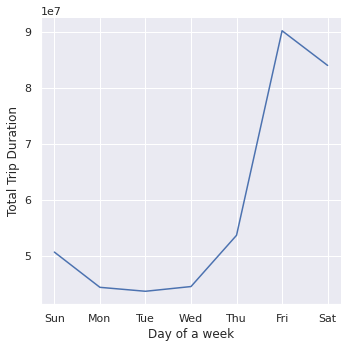

In [ ]:
week_plot = sns.relplot(grouped['day'], grouped['TripDuration'],markers = True,kind = 'line')
week_plot.set_titles('Weekly Scooter Usage in Minneapolis')
week_plot.set_ylabels('Total Trip Duration')
week_plot.set_xlabels('Day of a week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


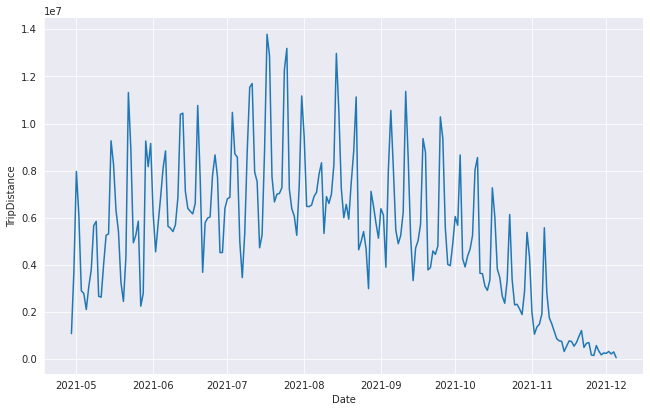

In [ ]:
grouped_date = scooter_zipcode_df.groupby(scooter_zipcode_df.Date).sum()
g1 = sns.relplot(grouped_date.index,grouped_date.TripDistance,kind='line')
g1.figure.set_size_inches(10, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


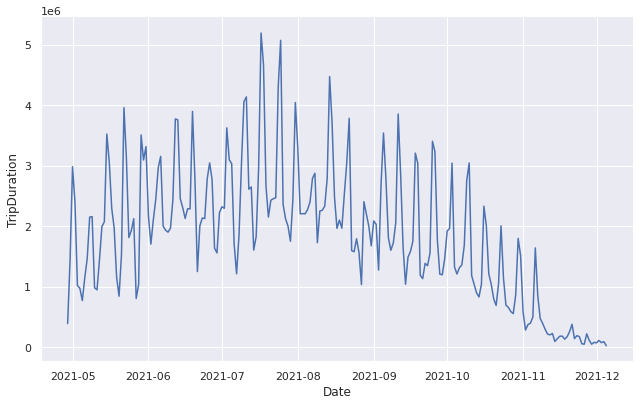

In [ ]:
grouped_date2 = scooter_zipcode_df.groupby(scooter_zipcode_df.Date).sum()
g2 = sns.relplot(grouped_date2.index,grouped_date.TripDuration,kind='line')
g2.figure.set_size_inches(10, 6)

Text(0.5, 1.0, 'Scooter Distance & Duration 2021')

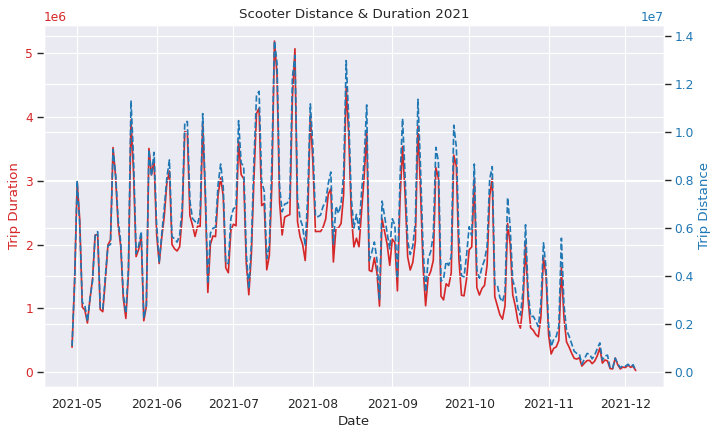

In [ ]:
plt.figure(figsize=(10,6), dpi=80)
plt.xlabel('Date')

color = 'tab:red'
plt.plot(grouped_date.index,grouped_date.TripDuration, label="Trip Duration",color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.ylabel('Trip Duration', color=color)

plt.twinx()
color = 'tab:blue'
plt.plot(grouped_date.index,grouped_date.TripDistance, color=color, linestyle="--", label="Acceleration")
plt.tick_params(axis='y', labelcolor=color)
plt.ylabel('Trip Distance', color=color)
plt.title('Scooter Distance & Duration 2021')

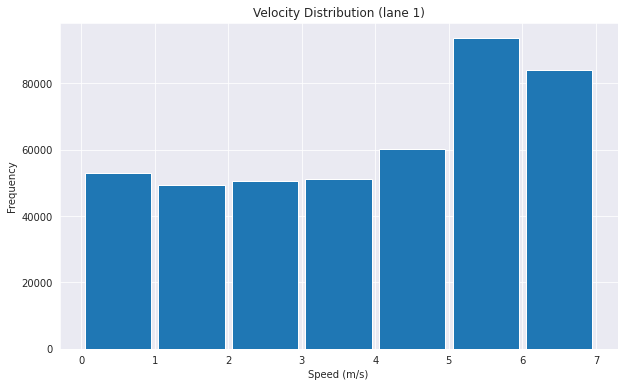

In [ ]:
plt.figure(figsize=(10,6))
vel_dis=plt.hist(scooter_zipcode_df['Dayofweek'],bins=np.linspace(0,7,8).tolist(),rwidth=0.9)
plt.title('Velocity Distribution (lane 1)')
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.show()
